This notebook will be covering some data cleaning followed by managing missing or deliberately introduced NaN values where the values for some features were missing. Finally the PCA will be implemented to know how many variables can this data be downed to so that minimum loss of variance is observed.

In [24]:
### Primary necessary imports and reading the data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
df_raw = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [33]:
df_raw.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [36]:
df_raw.shape

(858, 36)

In [37]:
df_raw.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [38]:
df_raw.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_raw.info() ### get info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

Seems like we are having some missing values which we will replace by Numpy's NaN for now.

In [26]:
df_nan = df_raw.replace('?', np.nan) 

In [27]:
df_nan.isnull().sum() ### check for null values in every column.

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [28]:
df = df_nan #temporary save

As we can see from the info above, there are few columns which were of 'object' type. So we will convert them to numeric type. Converting doesn't hurt hurt us as long as the columns are integer type or float type.

In [29]:
df1 = df.apply(pd.to_numeric)

Check for the info again. Now you will notice all the columns are either integer type or float type unlike previously where we also had object type variables.

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

It's high time that we remove all the NaN values we introduced earlier and add something more robust in place of them. So for the continous variables we will filling in with the median of that particular column and for the discrete variables we will be using either 0 or 1.

In [31]:
####заполнение значений NaN медианой для непрерывных переменных и 0/1 для дискретных переменных
col = ['Number of sexual partners','First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
      'Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)',
      'STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
      'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
      'STDs:molluscum contagiosum','STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis',
      'STDs: Time since last diagnosis']
for col in df:
    df[col] = df[col].fillna(df[col].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['IUD'] = df['IUD'].fillna(0)
df['IUD (years)'] = df['IUD (years)'].fillna(0)
df['STDs'] = df['STDs'].fillna(1)

In [13]:
####filling NaN values with median for continous variables and 0/1 for discrete variables.

df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0)
df['IUD (years)'] = df['IUD (years)'].fillna(0)
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

Now, we also have categorical type variables in our dataset. So we will be filling them with dummy values.

In [14]:
####filling NaN values with dummy values for categorical variables.

df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

Now check for any null or NaN values. As we can see there are no anomalies with the work done so far so we can move ahead.

In [15]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [16]:
df_final = df #temporary save

In [17]:
df.describe()

,Age,STDs: Number of diagnosis,Biopsy,Smokes_1,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_1,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.064103,0.015152,0.841492,0.143357,0.125874,0.313520,0.560606,0.136364,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,0.302545,0.245078,0.122227,0.365430,0.350641,0.331901,0.464194,0.496603,0.343374,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Importing the PCA algorithm to reduce the number of features for the classification. You can play with the variance percentage to get a fair idea of where the Eigen values are going for different variance percentage. After a lot of computation I chose to stay with 0.8 because after that the Eigen values were going below 1 which in our case is useless, so drop the components after this threshold.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('Biopsy', axis=1)
y = df["Biopsy"]

X = StandardScaler().fit_transform(X)  # Standardizing the values in X.

pca = PCA(0.80)  # Changes in variance percentage can be made here.
prin_comp = pca.fit_transform(X)
principalDf = pd.DataFrame(data = prin_comp)

print(principalDf)

print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)

            0         1         2         3          4         5         6  \
0   -1.238924  0.147985 -0.451984 -0.658863  -0.383031 -1.114888  1.417886   
1   -1.346698  0.145350 -0.422491 -0.708970  -0.733591 -1.278191  1.453722   
2   -1.158040  0.315043 -0.591149 -0.794299  -0.464896 -0.716270  0.811499   
3    8.313312  7.360855  1.239751  3.920406  14.839752 -4.044044 -0.656087   
4   -0.622583  0.851446 -1.494043 -0.619715   0.638127  1.342782 -2.229930   
..        ...       ...       ...       ...        ...       ...       ...   
853 -1.141761  0.292214 -0.572299 -0.800465  -0.360585 -0.828085  0.985142   
854 -0.996315  0.600650 -1.087300 -0.740124  -0.077619  0.112026 -0.841622   
855 -0.135910  0.821405 -1.349369  1.041485  -1.903018 -0.790147  0.720799   
856 -1.025292  0.577505 -0.995678 -0.911538  -0.185549 -0.058679 -0.674438   
857 -1.117468  0.491020 -0.880743 -0.829615  -0.281700 -0.312042 -0.278909   

            7         8         9        10        11        12

This is where you can plot the PCA components to know where the Eigen values are being mapped to each Principal Component.

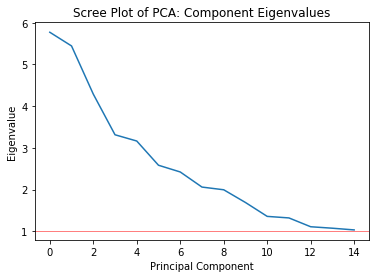

In [14]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

Now concatenate your Prinicipal Component dataframe with the Biopsy (the target variable) column of our original dataset.

In [15]:
finalDf = pd.concat([principalDf, df[["Biopsy"]]], axis = 1)
finalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Biopsy
0,-1.238924,0.147985,-0.451984,-0.658863,-0.383031,-1.114888,1.417886,-0.745182,1.126548,-0.058631,-0.771259,-0.117709,-0.151504,-0.678512,0.016030,0
1,-1.346698,0.145350,-0.422491,-0.708970,-0.733591,-1.278191,1.453722,-0.686895,1.145940,-0.252082,-0.760898,-0.424453,0.358398,-0.351073,-0.290855,0
2,-1.158040,0.315043,-0.591149,-0.794299,-0.464896,-0.716270,0.811499,-0.785974,1.261973,-0.286081,0.895467,0.222328,-0.029815,-0.019156,0.028253,0
3,8.313312,7.360855,1.239751,3.920406,14.839752,-4.044044,-0.656087,-1.600592,-1.127918,0.514490,2.509116,-0.475981,3.625766,-1.062291,0.142025,0
4,-0.622583,0.851446,-1.494043,-0.619715,0.638127,1.342782,-2.229930,1.360379,-1.357651,0.107332,1.937134,1.159574,-0.642097,0.251376,-0.183432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,-1.141761,0.292214,-0.572299,-0.800465,-0.360585,-0.828085,0.985142,-0.811356,1.255422,-0.121703,0.779978,0.044648,-0.328150,-0.118136,0.355271,0
854,-0.996315,0.600650,-1.087300,-0.740124,-0.077619,0.112026,-0.841622,1.015515,-0.914034,0.011474,0.598266,-0.364599,-0.073616,0.410904,0.042536,0
855,-0.135910,0.821405,-1.349369,1.041485,-1.903018,-0.790147,0.720799,1.572005,0.174042,5.234015,-0.247397,-0.194852,0.620536,0.493656,0.279719,0
856,-1.025292,0.577505,-0.995678,-0.911538,-0.185549,-0.058679,-0.674438,0.509293,-0.350853,-0.248195,1.765185,-0.098350,-0.195200,0.824474,0.407246,0


This is just a plot to show that it is really not worthy to reduce this dataset to 2 or perhaps 3 variables because there will be a lot of loss of variance and hence the essence of original data would be lost.

In [16]:
pca2 = PCA(n_components = 2)  # Changes can be made here.
prin_comp2 = pca2.fit_transform(X)
principalDf = pd.DataFrame(data = prin_comp2
             , columns = ['PC 1', 'PC 2'])

finalDf2 = pd.concat([principalDf2, df[['Biopsy']]], axis = 1)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['Biopsy'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'PC 1']
               , finalDf2.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

NameError: name 'principalDf2' is not defined